In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

### 1. Lee el csv pokemon.csv.

In [2]:
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### 2. Quita las variables que no queremos introducir en un PCA. ¿Hay alguna variable redundante? Quitala.

In [3]:
df2 = df.drop(columns=['#', 'Name', 'Total', 'Generation', 'Legendary', 'Type 1', 'Type 2'])
df2.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


### 3. Aplica un PCA

In [4]:
data = StandardScaler().fit_transform(df2)
data = pd.DataFrame(data, columns=df2.columns)
data

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503
1,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015
2,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635
3,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635
4,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853
...,...,...,...,...,...,...
795,-0.754692,0.647369,2.443765,0.831146,2.808099,-0.629341
796,-0.754692,2.497104,1.160233,2.665905,1.369846,1.436611
797,0.420917,0.955658,-0.444182,2.360112,2.088973,0.059310
798,0.420917,2.497104,-0.444182,2.971699,2.088973,0.403635


In [5]:
pca = PCA(n_components=4).fit(data)
data_pca = pca.transform(data)
data_pca = pd.DataFrame(data_pca, columns=['dim1', 'dim2', 'dim3', 'dim4'])

In [6]:
data_pca['Name']=df['Name']
data_pca

,dim1,dim2,dim3,dim4,Name
0,-1.556375,-0.021482,0.666504,0.184176,Bulbasaur
1,-0.362867,-0.050269,0.667913,0.269254,Ivysaur
2,1.280152,-0.062720,0.623914,0.331391,Venusaur
3,2.620916,0.704263,0.995538,-0.199321,VenusaurMega Venusaur
4,-1.758284,-0.706179,0.411454,-0.268602,Charmander
...,...,...,...,...,...
795,2.307521,2.303187,1.933811,-0.998507,Diancie
796,3.539772,-0.811013,0.655247,-1.821074,DiancieMega Diancie
797,2.458216,-0.515882,1.110197,0.818386,HoopaHoopa Confined
798,3.530397,-0.951065,0.408284,0.180710,HoopaHoopa Unbound


In [7]:
dt_components=pd.DataFrame(pca.components_, columns=data.columns)

In [8]:
dt_components

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,0.389886,0.439254,0.363747,0.457162,0.448570,0.335440
1,0.084835,-0.011825,0.628789,-0.305414,0.239097,-0.668463
2,-0.471926,-0.594153,0.069339,0.305612,0.565594,0.078513
3,0.717691,-0.405836,-0.419237,0.147517,0.185445,-0.297163


In [9]:
data_pca.sort_values("dim2", ascending=False).head(15)

,dim1,dim2,dim3,dim4,Name
230,1.076565,6.414470,4.979344,-1.204517,Shuckle
224,2.214607,4.399096,-0.401581,-2.049487,SteelixMega Steelix
333,2.400307,3.741016,-0.788126,-2.659885,AggronMega Aggron
456,0.854926,3.569270,1.874734,-0.473316,Bastiodon
223,0.838909,3.550464,-0.345746,-1.345487,Steelix
414,1.844043,3.448873,0.006156,-1.386357,Regirock
789,0.907733,3.267881,-1.831963,-1.123977,Avalugg
659,0.833232,2.829619,0.355161,-0.120111,Ferrothorn
773,0.931449,2.788383,2.382397,-0.598481,Carbink
528,1.327574,2.715605,2.301354,-0.097439,Probopass


,Explained Variance,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Dimension 1,0.4519,0.3899,0.4393,0.3637,0.4572,0.4486,0.3354
Dimension 2,0.1823,0.0848,-0.0118,0.6288,-0.3054,0.2391,-0.6685
Dimension 3,0.1298,-0.4719,-0.5942,0.0693,0.3056,0.5656,0.0785
Dimension 4,0.1201,0.7177,-0.4058,-0.4192,0.1475,0.1854,-0.2972


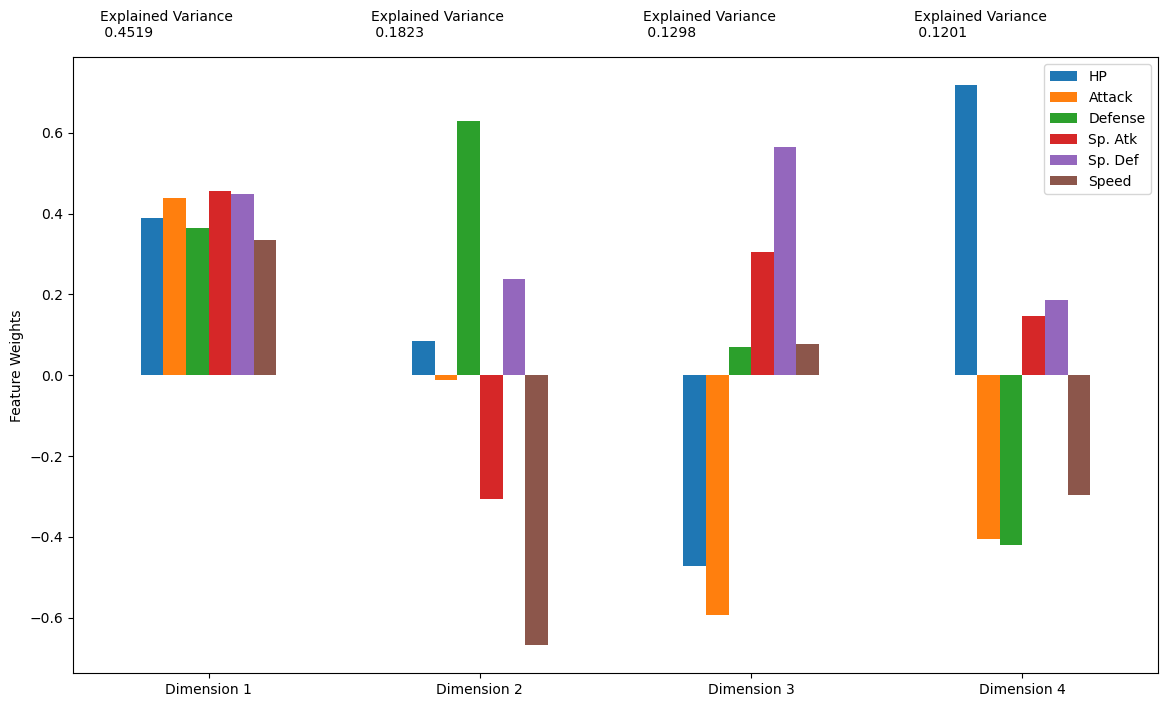

In [10]:
from PCAfunctions import *
pca_results(data, pca)

### Conclusiones:
 - Dimensión 1 --> Poder total medio (todas las variables considerablemente positivas)
 - Dimensión 2 --> Pokemons tanques defensivos (variables defensivas altas, pero velocidad y ataque bajos).
 - Dimensión 3 --> Pokemons especiales ofensivos (variables especiales y ofensiva alta, pero salud y defensa baja).
 - Dimensión 4 --> Pokemons curativos o especiales (salud y habilidades especiales altas, pero habilidades físicas y velocidad bajas

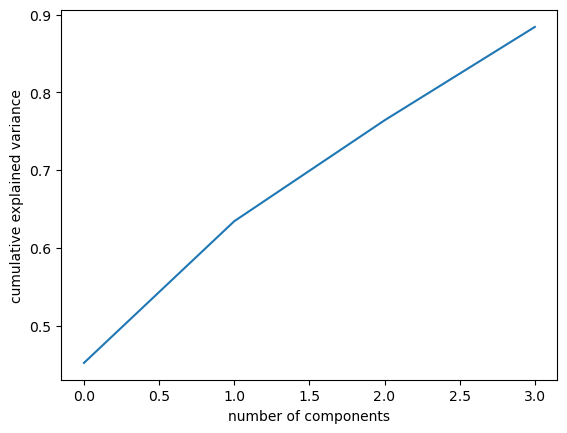

array([0.45190665, 0.63416023, 0.76395109, 0.88406197])

In [11]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
np.cumsum(pca.explained_variance_ratio_)

### 4. Interpreta el PCA

In [12]:
data_pca
data_reduced = data_pca[['dim1', 'dim2']]
data_reduced['Legendary']=df['Legendary'].astype(object)
data_reduced['Type']=df['Type 1']

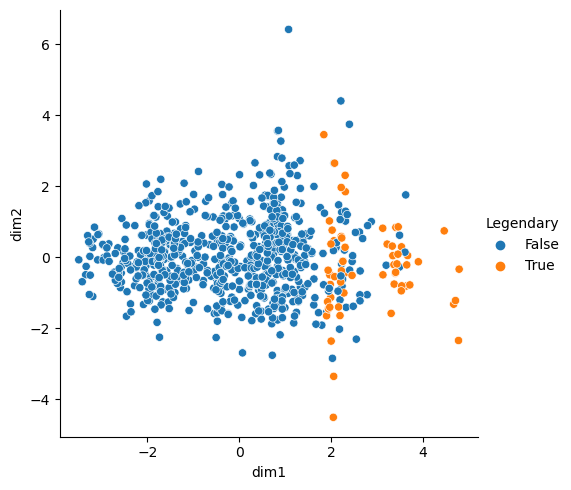

In [13]:
sns.relplot(x = "dim1", 
            y = "dim2",
            data= data_reduced, 
            hue= "Legendary")

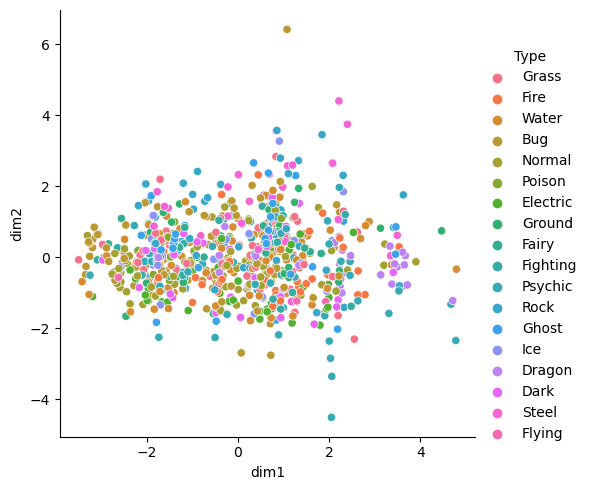

In [14]:
sns.relplot(x = "dim1", 
            y = "dim2",
            data= data_reduced, 
            hue= "Type")

<Axes: title={'center': 'PC plane with original feature projections.'}, xlabel='Dimension 1', ylabel='Dimension 2'>

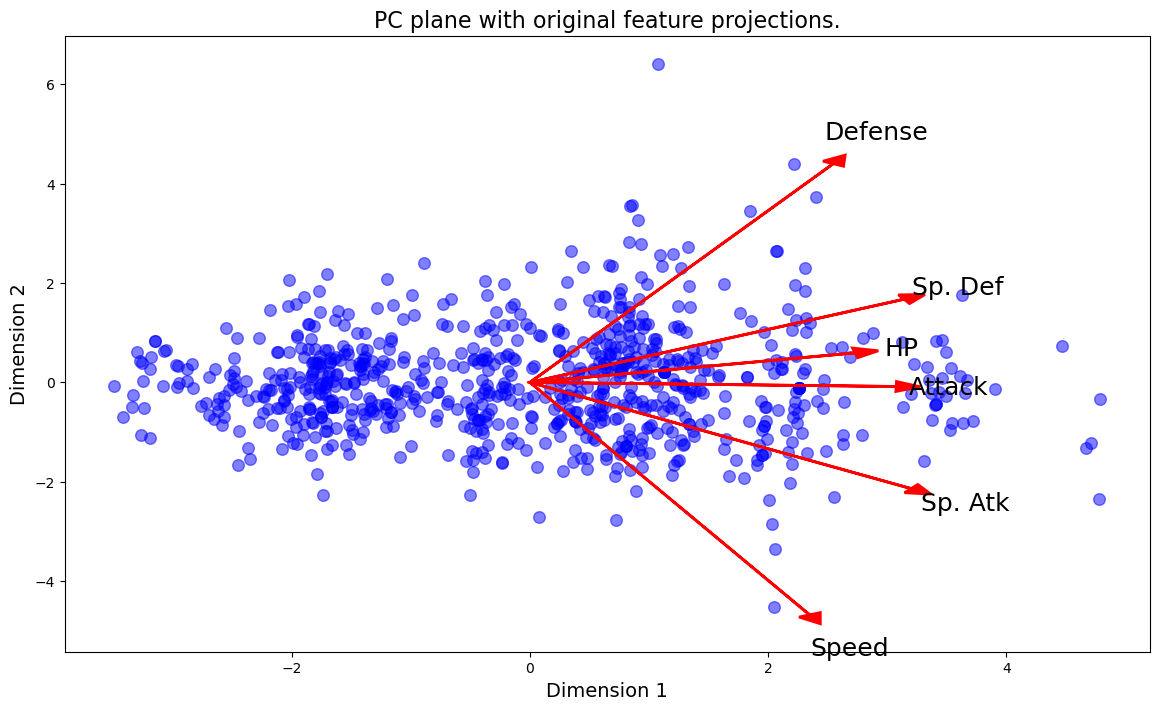

In [15]:
pca = PCA(n_components=2).fit(data)
reduced_data = pca.transform(data)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

# función del archivo PCAfunctions
biplot(data, reduced_data, pca)